In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [2]:
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
haberman.columns=["age","year","nodes","status"]
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print("Shape:",haberman.shape)
print("",haberman.info())

Shape: (306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
 None


In [5]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
haberman['status'] = haberman['status'].map({1:'survived', 2:'dead'})

In [7]:
haberman.groupby("status").count()

,age,year,nodes
status,,,
dead,81,81,81
survived,225,225,225


### Observation
the dataset is unbalanced 
    - 224 observations where the patient dint survive over 5 years
    - 81 observations wherer the patient  survived over 5 years


### Univariable Analysis

Box plot of age


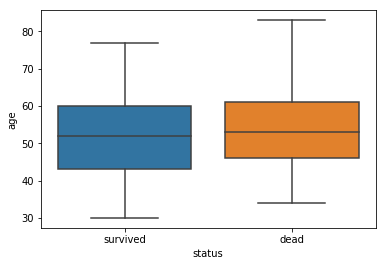

In [8]:
print("Box plot of age")
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

Box plot of year


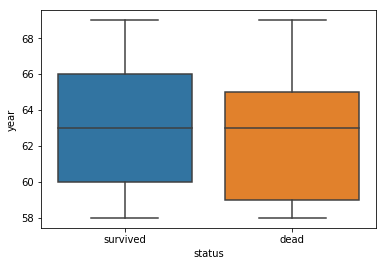

In [9]:
print("Box plot of year")
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

Box plot of nodes


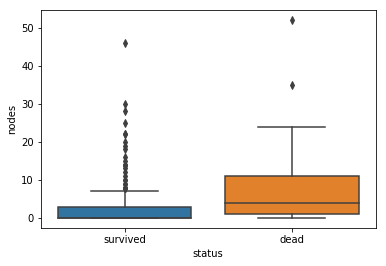

In [10]:
print("Box plot of nodes")
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

### Observations
Box plot shows that, the more number of axil nodes, the more patients likely to die

The patients who had axil nodes from 1 to 24 are the majority of patients who died.



 ### 2-D Scatter Plot

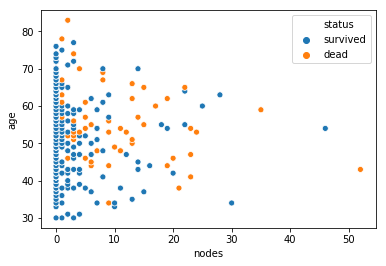

In [11]:

ax = sns.scatterplot( x='nodes', y='age', data=haberman,hue="status")
plt.show()

Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age.

It is very much less likely to have patients with axil nodes more than 30.

Patients who are older than 50 and have axil nodes greater than 10 are more likely to die.

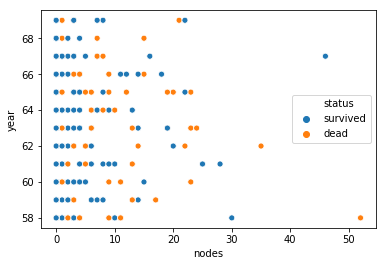

In [12]:

ax = sns.scatterplot( x='nodes', y='year', data=haberman,hue="status")
plt.show()

Here we can conclude that large number of operation were done in span of 7 years between 1960 and 1966

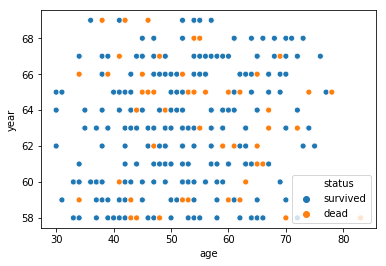

In [13]:
ax = sns.scatterplot( x='age', y='year', data=haberman,hue="status")
plt.show()

Looks uniform through out the years

### Pair Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


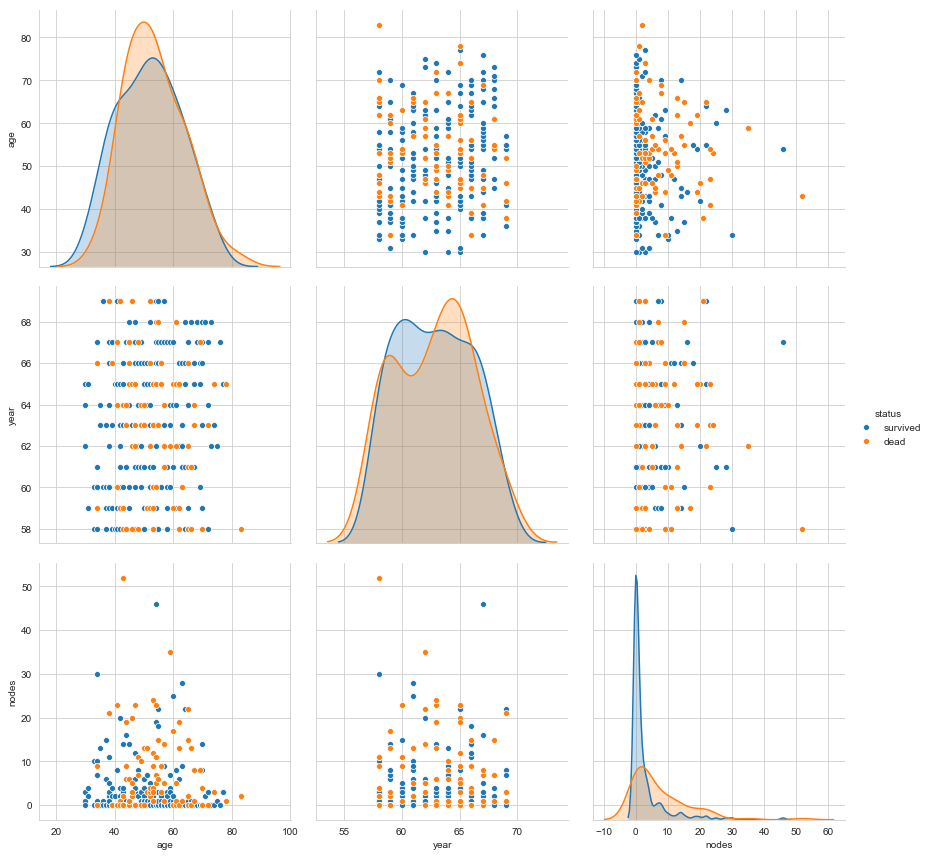

In [29]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=4);
plt.show();

### Histograms and PDF

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


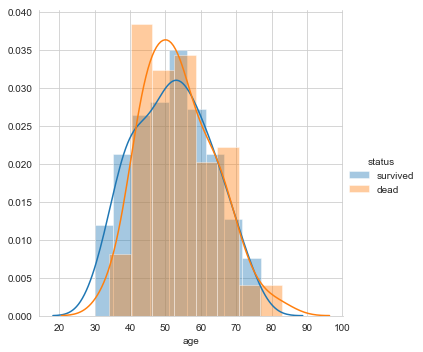

In [26]:
## age histogram
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


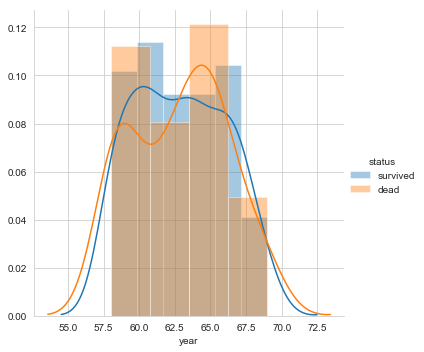

In [16]:
## year histogram
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

1.This histogram is overlapping each other, but still we can say that people within range of 40-60 are more likely to die.

2.People less than age 40 are more likely to survive

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


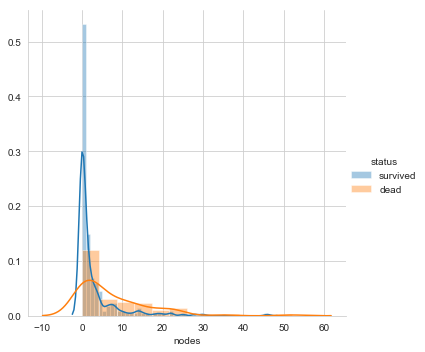

In [17]:
## nodes histogram
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

We can conclude that from this histogram (axil_node) that, Patients having 0 axil nodes are more likely to survive

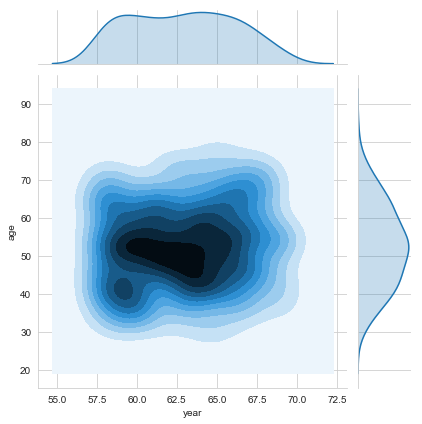

In [21]:
sns.jointplot(x="year", y="age", data=haberman, kind="kde");
plt.show();


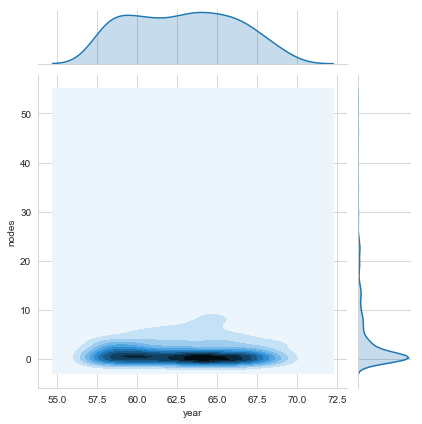

In [22]:
sns.jointplot(x="year", y="nodes", data=haberman, kind="kde");
plt.show();

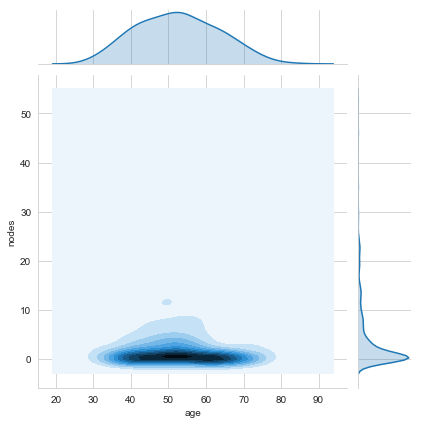

In [23]:
sns.jointplot(x="age", y="nodes", data=haberman, kind="kde");
plt.show();

# Final Conclusion
1. From this Dataset we can say that the majority of operations are performed on people age range between 38 and 68, where most of the points plotted on scatter plot (Operation_year vs Age)

2. We can see that there is quite good concentration of data point When axil_node is 0.

3. Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age.as the axillary nodes detected is 0

4.  Patients with axil nodes more than 30.have a very low survival rate.

5.  Patients who are older than 50 have a very low survuval rate

6. People less than age 40 are more likely to survive 

7. the more number of axil nodes is directly corelated with the  likelyhood of  death
